# `countries.ipynb`

### Author: Anthony Hein

#### Last updated: 12/7/2021

# Overview:

What countries are represented in the dataset.

---

## Setup

In [1]:
from datetime import datetime
import git
import os
import re
from typing import List
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Load `races_all.csv`

In [3]:
races_all = pd.read_csv(f"{BASE_DIR}/data/streamline/races_all.csv", low_memory=False) 
races_all.head()

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class
0,267255,Southwell (AW),03:40,97/01/01,New Year Handicap Class E,Class 5,0-70,3yo,1m,Standard,NaN,"[2752.25, 833.0, 406.5, 193.25]",106.9,4184.0,1609.0,GB,0,5
1,297570,Southwell (AW),12:35,97/01/01,Resolution Claiming Stakes Class F (Div I),Class 6,NaN,4yo+,7f,Standard,NaN,"[1944.0, 544.0, 264.0]",91.0,2752.0,1407.0,GB,0,6
2,334421,Southwell (AW),01:05,97/01/01,One Too Many Median Auction Maiden Apprentices...,Class 6,NaN,4-6yo,1m3f,Standard,NaN,"[2502.0, 702.0, 342.0]",150.7,3546.0,2212.0,GB,0,6
3,366304,Southwell (AW),03:10,97/01/01,Morning Call Selling Stakes Class G Southwell ...,Class 6,NaN,3yo,1m,Standard,NaN,"[2189.0, 614.0, 299.0]",108.6,3102.0,1609.0,GB,0,6
4,13063,Southwell (AW),02:40,97/01/01,Thinking &amp; Drinking Handicap Class E,Class 5,0-70,4yo+,2m½f,Standard,NaN,"[2726.25, 825.0, 402.5, 191.25]",231.4,4144.0,3318.5,GB,0,5


In [4]:
races_all.shape

(396572, 18)

---

## Countries

In [16]:
d = races_all['countryCode'].value_counts().to_dict().items()
countries = [x[0] for x in d][:5]
frequency = [x[1] for x in d][:5]

In [17]:
d

dict_items([('GB', 263644), ('IE', 67344), ('FR', 21560), ('US', 12743), ('SAF', 10990), ('AU', 4297), ('HK', 3624), ('AE', 2444), ('JP', 1686), ('ARAB', 1530), ('CAN', 1366), ('GER', 1357), ('ARG', 770), ('IT', 757), ('JER', 574), ('BRZ', 571), ('NZ', 368), ('CHI', 354), ('SWE', 154), ('NOR', 86), ('URU', 81), ('TUR', 57), ('SWI', 55), ('GUE', 50), ('DEN', 37), ('SIN', 24), ('SPA', 14), ('CZE', 13), ('KOR', 8), ('KSA', 7), ('BEL', 4), ('BHR', 1), ('MAC', 1), ('PER', 1)])

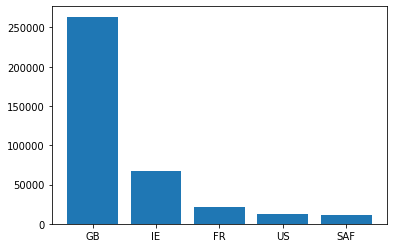

In [19]:
plt.bar(countries, frequency)
plt.show()

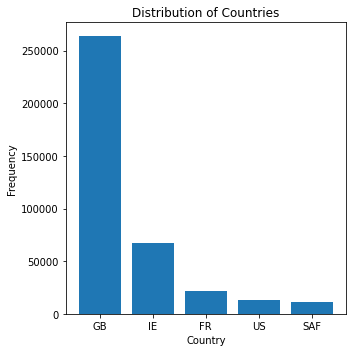

In [22]:
fig = plt.figure(figsize=(5,5))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0:1, 0:1])

ax1.set_title("Distribution of Countries")
ax1.bar(countries, frequency)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Country")

plt.tight_layout()

fig.savefig(f"{BASE_DIR}/figures/country_distribution.png")

plt.show()

---